Analysis of e-commerce



1.Evaluation of products, analyzing product sales, and product web views, and a justified recommendation on cutting 20% of products from the store, listing the products to remove. ( by sales QTY? by profit margin?[sales price - cost]

2. Examination of users, users' data, purchase and returns behavior, and web behavior. Delivering a categorization of users into meaningful segments with an explanation of how that categorization could be used by the business. Each user will need to be assigned a category. (k-means cluster?)


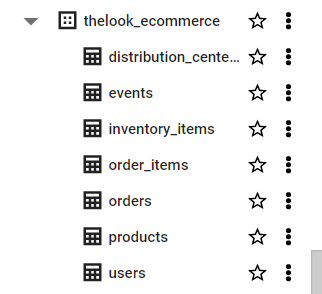

loading data

In [1]:
# authenticate with the google account used in console
from google.colab import auth
auth.authenticate_user()

In [2]:
import pandas as pd
project_id = 'emerald-ellipse-380023'

In [6]:
sql = '''
SELECT * FROM `bigquery-public-data.thelook_ecommerce.users`
'''

users = pd.io.gbq.read_gbq(sql,project_id=project_id)

In [7]:
users.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,4682,Jessica,Williams,jessicawilliams@example.net,64,F,Acre,6551 Blevins Ford,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Organic,2022-08-30 12:05:00+00:00
1,28050,Dorothy,Parks,dorothyparks@example.net,28,F,Acre,9284 Adams Parkway Apt. 634,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Email,2019-01-11 08:27:00+00:00
2,32873,Joy,Daugherty,joydaugherty@example.com,55,F,Acre,07707 Schwartz Groves,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Facebook,2020-03-07 02:33:00+00:00
3,36221,Lindsay,Ross,lindsayross@example.net,36,F,Acre,562 Espinoza Islands Apt. 956,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2023-02-15 03:32:00+00:00
4,37353,Isaiah,Roberts,isaiahroberts@example.org,33,M,Acre,05172 Harris Prairie Suite 733,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-04-27 15:44:00+00:00


In [8]:
sql = '''
SELECT * FROM `bigquery-public-data.thelook_ecommerce.products`
'''

products = pd.io.gbq.read_gbq(sql,project_id=project_id)

In [9]:
products.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,27569,92.652563,Swim,2XU Men's Swimmers Compression Long Sleeve Top,2XU,150.410004,Men,B23C5765E165D83AA924FA8F13C05F25,1
1,27445,24.719661,Swim,TYR Sport Men's Square Leg Short Swim Suit,TYR,38.990002,Men,2AB7D3B23574C3DEA2BD278AFD0939AB,1
2,27457,15.897600,Swim,TYR Sport Men's Solid Durafast Jammer Swim Suit,TYR,27.600000,Men,8F831227B0EB6C6D09A0555531365933,1
3,27466,17.850000,Swim,TYR Sport Men's Swim Short/Resistance Short Sw...,TYR,30.000000,Men,67317D6DCC4CB778AEB9219565F5456B,1
4,27481,29.408001,Swim,TYR Alliance Team Splice Jammer,TYR,45.950001,Men,213C888198806EF1A0E2BBF2F4855C6C,1


In [10]:
sql = '''
SELECT * FROM `bigquery-public-data.thelook_ecommerce.orders`
'''

orders = pd.io.gbq.read_gbq(sql,project_id=project_id)

In [11]:
orders.head()

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,4,2,Shipped,F,2022-07-17 03:32:00+00:00,NaT,2022-07-19 18:33:00+00:00,NaT,2
1,5,2,Shipped,F,2022-12-01 03:32:00+00:00,NaT,2022-12-03 17:51:00+00:00,NaT,1
2,15,8,Shipped,F,2023-03-19 12:31:00+00:00,NaT,2023-03-21 02:21:00+00:00,NaT,1
3,32,21,Shipped,F,2023-01-31 14:04:00+00:00,NaT,2023-02-01 23:58:00+00:00,NaT,2
4,52,41,Shipped,F,2020-09-14 10:58:00+00:00,NaT,2020-09-15 06:04:00+00:00,NaT,2


In [12]:
sql = '''
SELECT * FROM `bigquery-public-data.thelook_ecommerce.order_items`
'''

order_items = pd.io.gbq.read_gbq(sql,project_id=project_id)

In [13]:
order_items.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,70386,48639,38876,13606,190373,Shipped,2022-05-20 12:01:36+00:00,2022-05-20 04:48:00+00:00,NaT,NaT,2.5
1,87975,60674,48475,13606,237804,Shipped,2022-01-31 15:11:04+00:00,2022-01-29 16:54:00+00:00,NaT,NaT,2.5
2,15312,10536,8327,13606,41538,Processing,2022-12-20 13:58:22+00:00,NaT,NaT,NaT,2.5
3,104694,72227,57790,13606,282884,Processing,2022-01-17 18:25:08+00:00,NaT,NaT,NaT,2.5
4,126076,86945,69709,13606,340758,Processing,2023-03-05 12:12:25+00:00,NaT,NaT,NaT,2.5


In [14]:
sql = '''
SELECT * FROM `bigquery-public-data.thelook_ecommerce.inventory_items`
'''

inventory_items = pd.io.gbq.read_gbq(sql,project_id=project_id)

In [15]:
inventory_items.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,94658,16898,2022-12-30 10:06:54+00:00,2023-01-20 10:16:54+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,,25.0,Men,22811EE19846217512507785E74D12CC,3
1,94659,16898,2020-11-20 00:49:00+00:00,NaT,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,,25.0,Men,22811EE19846217512507785E74D12CC,3
2,94660,16898,2021-07-21 08:02:00+00:00,NaT,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,,25.0,Men,22811EE19846217512507785E74D12CC,3
3,189764,16898,2021-11-01 20:55:43+00:00,2021-12-18 13:20:43+00:00,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,,25.0,Men,22811EE19846217512507785E74D12CC,3
4,189765,16898,2022-01-07 03:19:00+00:00,NaT,13.925,Tops & Tees,Quiksilver Waterman Men's On The Rise,,25.0,Men,22811EE19846217512507785E74D12CC,3


In [16]:
sql = '''
SELECT * FROM `bigquery-public-data.thelook_ecommerce.events`
'''

events = pd.io.gbq.read_gbq(sql,project_id=project_id)

In [17]:
events.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,42306,3223,6,411a525a-6a29-4bfa-9ddc-a367e2bc5026,2022-08-17 03:50:01+00:00,146.167.68.189,Bogatynia,Dolnośląskie,59,Safari,Adwords,/cart,cart
1,2015324,<NA>,3,6ca5ad3a-e779-4973-a24e-cb3c9a604ce9,2019-06-09 12:04:00+00:00,103.70.116.106,Bogatynia,Dolnośląskie,59,Chrome,Adwords,/cart,cart
2,1063975,81843,6,b4e183d5-9ed8-483f-a2a8-4186fddca53c,2021-11-23 07:02:19+00:00,60.193.63.50,Bogatynia,Dolnośląskie,59,Chrome,Adwords,/cart,cart
3,686100,52696,6,64522231-bdcb-472c-b9c4-4017d4c8c704,2021-09-24 11:26:22+00:00,171.157.71.173,Bogatynia,Dolnośląskie,59,Chrome,Adwords,/cart,cart
4,629284,48363,3,02740308-a94e-4c9d-a532-287d2a6a7b69,2022-12-23 13:43:52+00:00,114.213.215.184,Bogatynia,Dolnośląskie,59,Firefox,Email,/cart,cart


In [18]:
sql = '''
SELECT * FROM `bigquery-public-data.thelook_ecommerce.distribution_centers`
'''

distribution_centers = pd.io.gbq.read_gbq(sql,project_id=project_id)

In [19]:
distribution_centers.head()

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698
3,4,Los Angeles CA,34.0500,-118.2500
4,5,New Orleans LA,29.9500,-90.0667
